In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.shape

(253680, 22)

In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# Ubah data dari float ke int
df[df.columns] = df[df.columns].apply(lambda x: x.astype(int))

In [8]:
print(df.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [9]:
# Disini, hanya BMI yang merupakan data numerik yang memiliki angka outliers, data numerik lainnya masih dalam batas aman
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    return outliers


def print_outlier_BMI(df):
    outliers = check_outlier(df['BMI'])
    print(f'Number of Outliers for BMI: {len(outliers)}')

print_outlier_BMI(df)

Number of Outliers for BMI: 9847


In [10]:
def handle_outlier_BMI(df):
    Q1 = df['BMI'].quantile(0.25)
    Q3 = df['BMI'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Drop the outliers
    lower_outliers = np.where(df['BMI'] <= lower_bound)[0]
    upper_outliers = np.where(df['BMI'] >= upper_bound)[0]
    df.drop(index = upper_outliers, inplace = True)
    df.drop(index = lower_outliers, inplace = True)
    df.reset_index(drop=True, inplace=True)

handle_outlier_BMI(df)

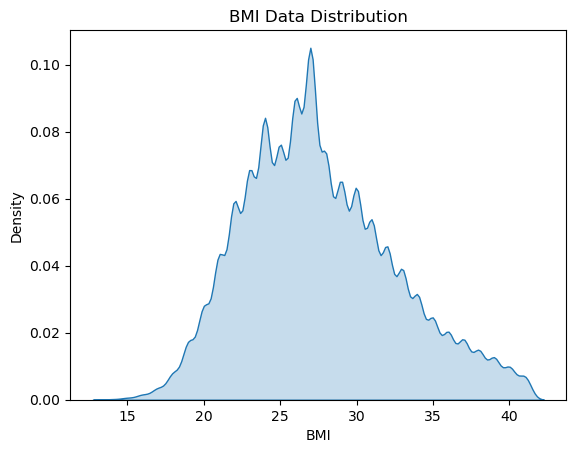

In [11]:
# plot df['BMI] data distribution with kde
sns.kdeplot(df['BMI'], fill=True)
plt.title('BMI Data Distribution')
plt.show()

In [12]:
# Handle duplicate data
df.duplicated().sum()

24203

In [13]:
df = df.drop_duplicates()

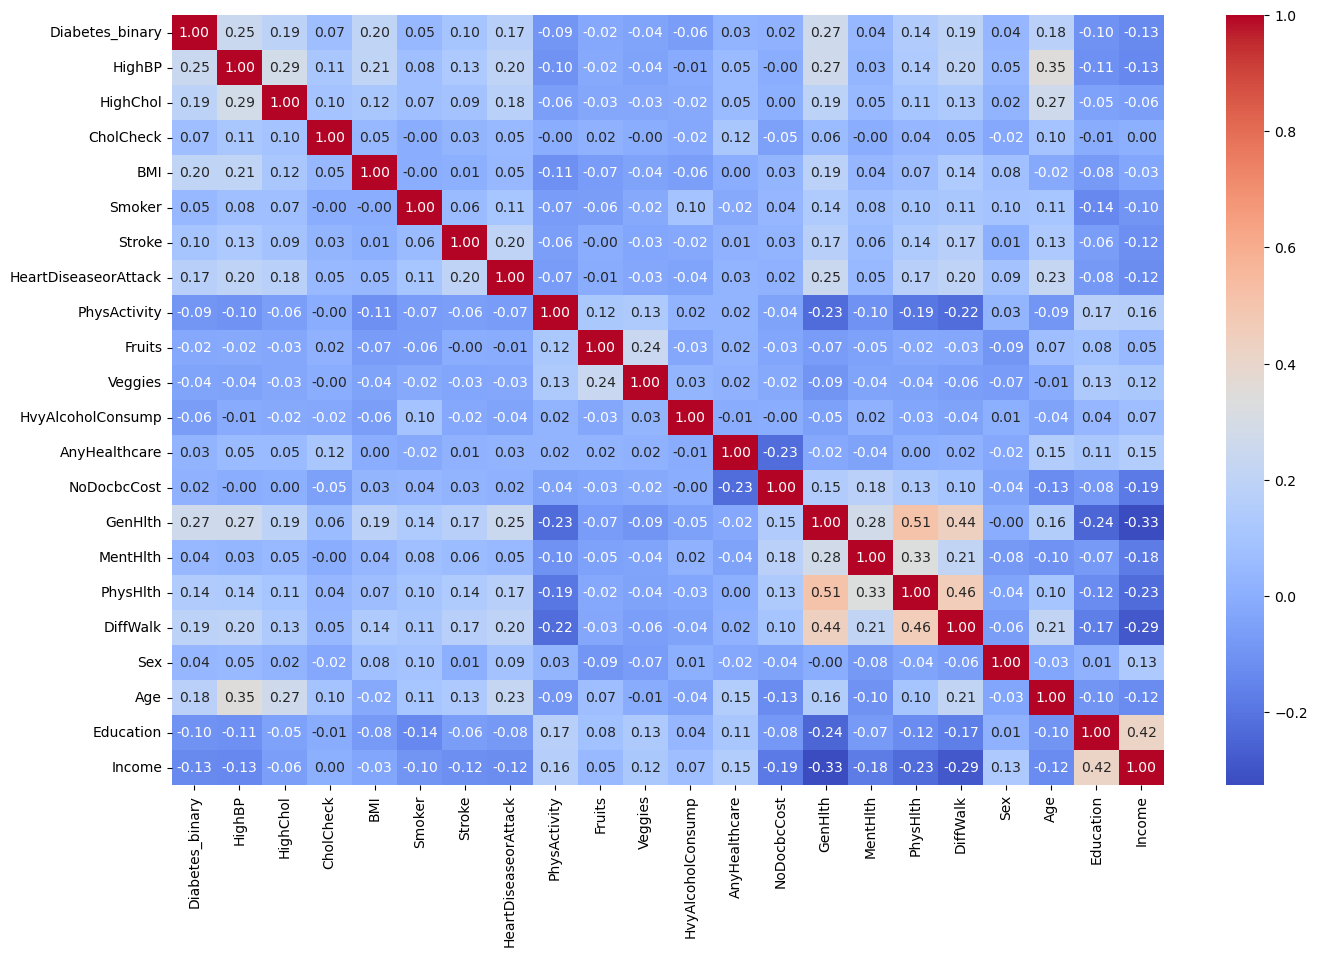

In [14]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True , cmap ='coolwarm', fmt = ".2f")
plt.show()

## **Pearson Correlation**

In [15]:
correlation_pearson = df.corr(method='pearson')
correlation_pearson['Diabetes_binary'].abs().sort_values(ascending = False)

Diabetes_binary         1.000000
GenHlth                 0.265285
HighBP                  0.246928
BMI                     0.202706
HighChol                0.189925
DiffWalk                0.187311
Age                     0.181838
HeartDiseaseorAttack    0.167169
PhysHlth                0.143015
Income                  0.132002
Stroke                  0.099215
Education               0.098386
PhysActivity            0.090788
CholCheck               0.071039
HvyAlcoholConsump       0.064051
Smoker                  0.046208
MentHlth                0.044812
Veggies                 0.040681
Sex                     0.040387
AnyHealthcare           0.026252
Fruits                  0.022167
NoDocbcCost             0.016332
Name: Diabetes_binary, dtype: float64

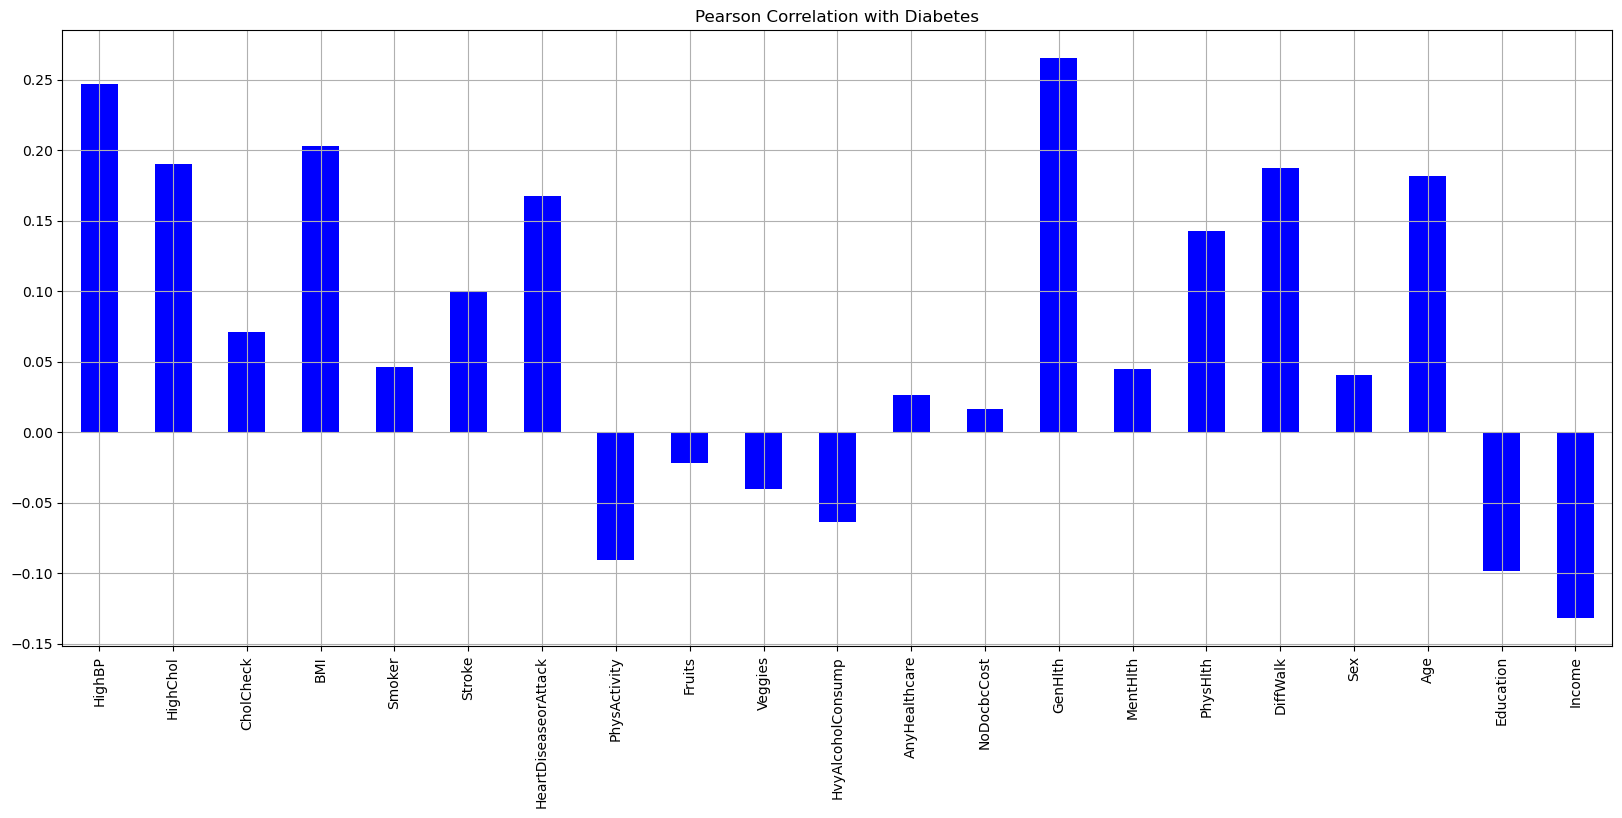

In [16]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary, method = 'pearson').plot(kind='bar', grid=True, figsize=(20, 8)
, title="Pearson Correlation with Diabetes",color="blue");

## **Spearman Correlation**

In [17]:
correlation_spearman = df.corr(method='spearman')
correlation_spearman['Diabetes_binary'].abs().sort_values(ascending = False)

Diabetes_binary         1.000000
GenHlth                 0.261647
HighBP                  0.246928
BMI                     0.199843
HighChol                0.189925
DiffWalk                0.187311
Age                     0.180803
HeartDiseaseorAttack    0.167169
Income                  0.130552
PhysHlth                0.123360
Stroke                  0.099215
Education               0.092840
PhysActivity            0.090788
CholCheck               0.071039
HvyAlcoholConsump       0.064051
Smoker                  0.046208
Veggies                 0.040681
Sex                     0.040387
AnyHealthcare           0.026252
Fruits                  0.022167
NoDocbcCost             0.016332
MentHlth                0.009484
Name: Diabetes_binary, dtype: float64

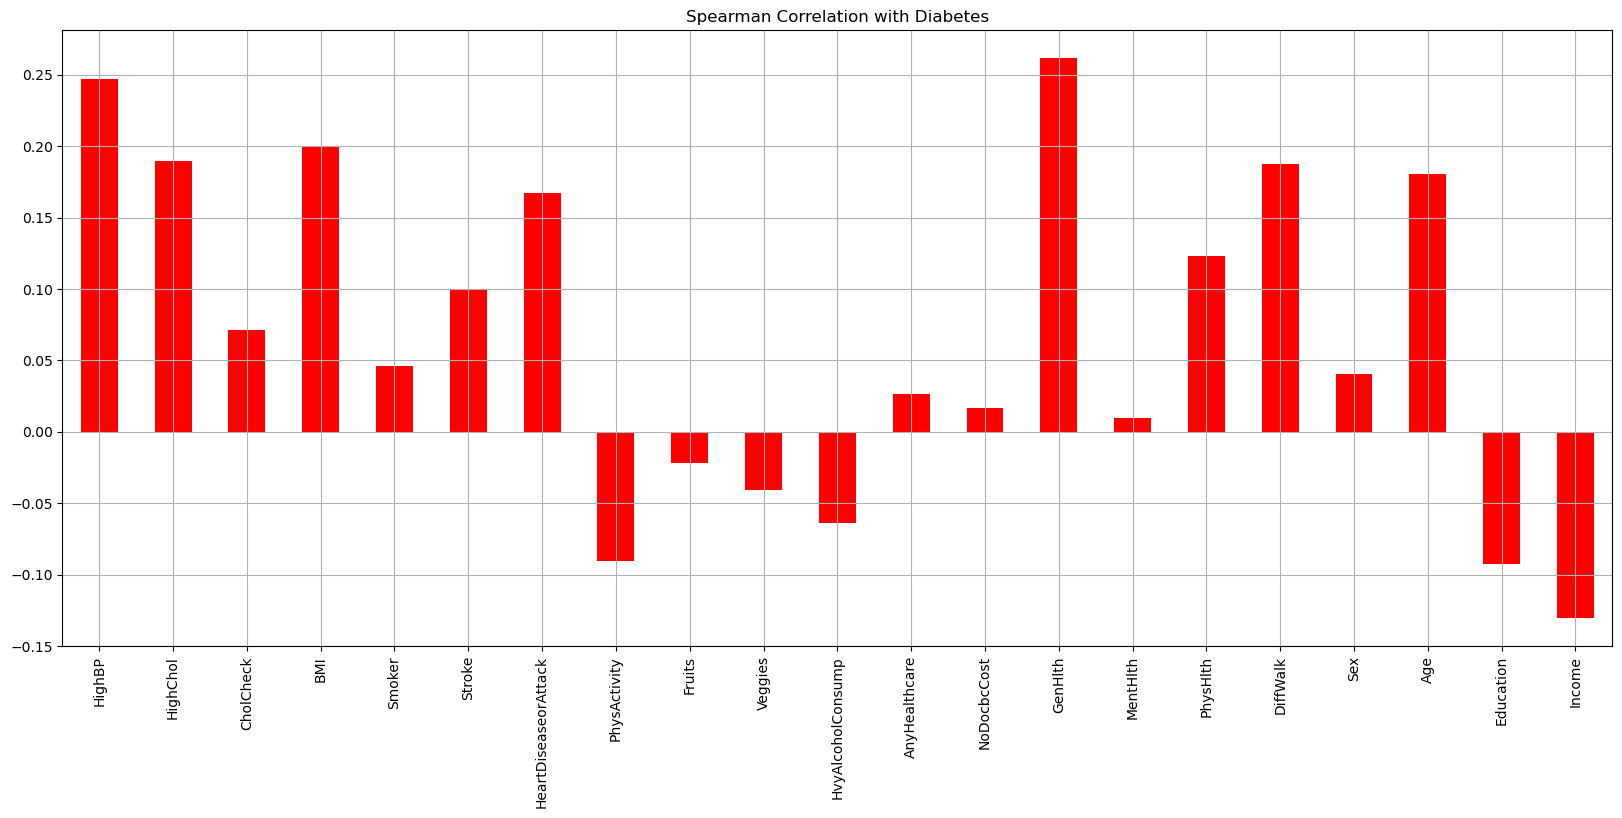

In [18]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary, method = 'spearman').plot(kind='bar', grid=True, figsize=(20, 8)
, title="Spearman Correlation with Diabetes",color="red");

In [19]:
# Drop Features that have low correlation with Diabetes
# Drop based on pearson correlation
columns_to_drop_pearson = ["Fruits" , "Veggies" , "Sex" , "NoDocbcCost" , "AnyHealthcare"]
columns_to_drop_spearman = ["Fruits" , "MentHlth" , "Sex" , "NoDocbcCost" , "AnyHealthcare"]

df_pearson = df.drop(columns_to_drop_pearson, axis = 1)
df_spearman = df.drop(columns_to_drop_spearman, axis = 1)

In [20]:
# Check data imbalance
df["Diabetes_binary"].value_counts()

Diabetes_binary
0    187900
1     31730
Name: count, dtype: int64

In [21]:
# Scaling the data
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss

X_pearson = df_pearson.drop("Diabetes_binary", axis = 1)
y_pearson = df_pearson["Diabetes_binary"]

X_spearman = df_spearman.drop("Diabetes_binary", axis = 1)
y_spearman = df_spearman["Diabetes_binary"]

X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]

## Modeling without feature selection

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
X_train , X_test, y_train, y_test= train_test_split(X, y, test_size=0.2 , random_state=42)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [24]:
print('Testing accuracy: ',accuracy_score(y_pred, y_test))
print('Training accuracy:',rf.score(X_train, y_train))
print('Classification report:\n',classification_report(y_test, y_pred))

Testing accuracy:  0.847402449574284
Training accuracy: 0.9943029185448254
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     37496
           1       0.43      0.14      0.21      6430

    accuracy                           0.85     43926
   macro avg       0.65      0.55      0.56     43926
weighted avg       0.80      0.85      0.81     43926



In [44]:
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred, average="weighted"), 4)}')

Weighted Precision score: 0.804
Weighted Recall score: 0.8474
Weighted f1 score: 0.8121


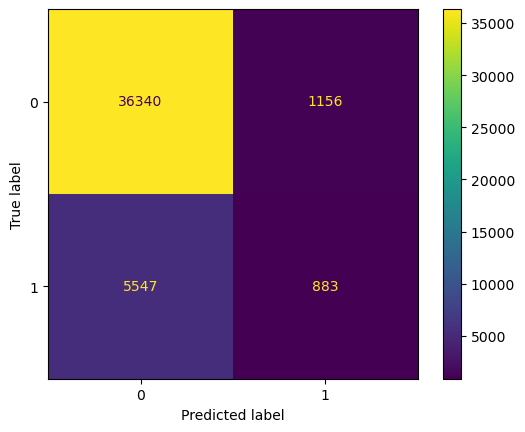

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp0 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp0.plot()

# **Modeling**

## Pearson Result

In [26]:
from sklearn.model_selection import train_test_split
X_train_p , X_test_p , y_train_p , y_test_p = train_test_split(X_pearson, y_pearson, test_size=0.2 , random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_p = sc.fit_transform(X_train_p)
X_test_p = sc.fit_transform(X_test_p)

**Random Forest with Hyperparameter tuning**

In [28]:
# use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
params = {
        'n_estimators': [10, 30, 100, 300, 400],
        'max_depth': [3, 5, 7, 8, 9, 10],
        'min_samples_split': [2, 4, 6, 8, 10],
        'max_features': ['sqrt', 'log2'],  
        'bootstrap': [True]
    }

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rs_rf_pearson= RandomizedSearchCV(rf, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_rf_pearson.fit(X_train_p, y_train_p)

rf_tuned_pearson = rs_rf_pearson.best_estimator_
rf_tuned_pearson.fit(X_train_p, y_train_p)

y_pred_tuned_pearson = rf_tuned_pearson.predict(X_test_p)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [50]:
print('Testing accuracy:',accuracy_score(y_pred_tuned_pearson, y_test_p))
print('Training accuracy:',rf_tuned_pearson.score(X_train_p, y_train_p))
print('Classification report:\n', classification_report(y_test_p, y_pred_tuned_pearson))

Testing accuracy: 0.8568956882028866
Training accuracy: 0.8618415061694669
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     37496
           1       0.58      0.08      0.14      6430

    accuracy                           0.86     43926
   macro avg       0.72      0.53      0.53     43926
weighted avg       0.82      0.86      0.81     43926



In [45]:
print(f'Weighted Precision score: {round(precision_score(y_test_p, y_pred_tuned_pearson, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test_p, y_pred_tuned_pearson, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test_p, y_pred_tuned_pearson, average="weighted"), 4)}')

Weighted Precision score: 0.8216
Weighted Recall score: 0.8569
Weighted f1 score: 0.807


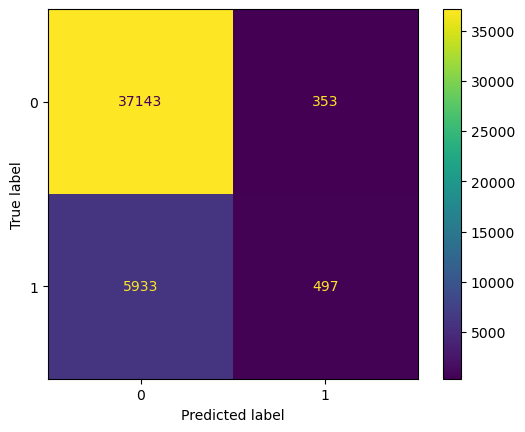

In [30]:
cm_tuned_pearson = confusion_matrix(y_test_p, y_pred_tuned_pearson)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_pearson, display_labels=rf_tuned_pearson.classes_)
disp1.plot()

**Random Forest without Hyperparameter tuning**

In [31]:
rf_vanilla_pearson = RandomForestClassifier(random_state=42)
rf_vanilla_pearson.fit(X_train_p, y_train_p)
y_pred_vanilla_pearson = rf_vanilla_pearson.predict(X_test_p)
crossval_score_pearson = cross_val_score(rf_vanilla_pearson, X_pearson, y_pearson, cv=skf, scoring='accuracy')

In [32]:
print('Testing accuracy: ',accuracy_score(y_pred_vanilla_pearson, y_test_p))
print('Training accuracy:',rf_vanilla_pearson.score(X_train_p, y_train_p))
print('Classification report:\n',classification_report(y_test_p, y_pred_vanilla_pearson))

Testing accuracy:  0.84095979602058
Training accuracy: 0.9842234667395164
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     37496
           1       0.40      0.16      0.23      6430

    accuracy                           0.84     43926
   macro avg       0.63      0.56      0.57     43926
weighted avg       0.80      0.84      0.81     43926



In [46]:
print(f'Weighted Precision score: {round(precision_score(y_test_p, y_pred_vanilla_pearson, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test_p, y_pred_vanilla_pearson, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test_p, y_pred_vanilla_pearson, average="weighted"), 4)}')

Weighted Precision score: 0.8002
Weighted Recall score: 0.841
Weighted f1 score: 0.8117


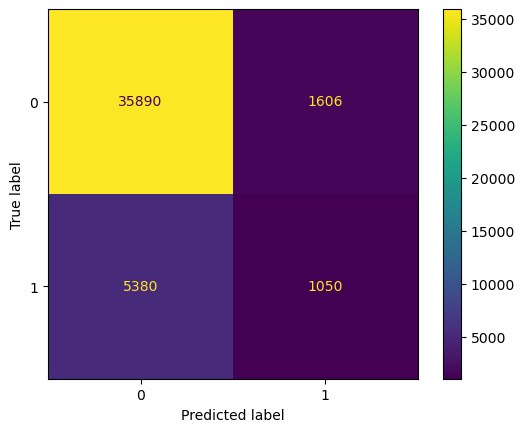

In [33]:
# Create confusion matrix
cm_vanilla_pearson = confusion_matrix(y_test_p, y_pred_vanilla_pearson)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_vanilla_pearson, display_labels=rf_vanilla_pearson.classes_)
disp2.plot()



## Spearman

In [34]:
X_train_s , X_test_s , y_train_s , y_test_s = train_test_split(X_spearman, y_spearman, test_size=0.2 , random_state=42)

In [35]:
X_train_s = sc.fit_transform(X_train_s)
X_test_s = sc.fit_transform(X_test_s)

**Random Forest with Hyperparameter tuning**

In [36]:
rf = RandomForestClassifier(random_state=42)
params = {
        'n_estimators': [10, 30, 100, 300, 400],
        'max_depth': [3, 5, 7, 8, 9, 10],
        'min_samples_split': [2, 4, 6, 8, 10],
        'max_features': ['sqrt', 'log2'],  
        'bootstrap': [True]
    }

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Instantiate cross validated Decision Tree random search
rs_rf_spearman= RandomizedSearchCV(rf, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_rf_spearman.fit(X_train_s, y_train_s)

rf_tuned_spearman = rs_rf_spearman.best_estimator_
rf_tuned_spearman.fit(X_train_s, y_train_s)

y_pred_tuned_spearman = rf_tuned_spearman.predict(X_test_s)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [37]:
print('Testing accuracy:',accuracy_score(y_pred_tuned_spearman, y_test_s))
print('Training accuracy:',rf_tuned_spearman.score(X_train_s, y_train_s))
print('Classification report:\n', classification_report(y_test_s, y_pred_tuned_spearman))

Testing accuracy: 0.857328233847835
Training accuracy: 0.8618130492191413
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     37496
           1       0.59      0.08      0.14      6430

    accuracy                           0.86     43926
   macro avg       0.73      0.54      0.53     43926
weighted avg       0.82      0.86      0.81     43926



In [47]:
print(f'Weighted Precision score: {round(precision_score(y_test_s, y_pred_tuned_spearman, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test_s, y_pred_tuned_spearman, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test_s, y_pred_tuned_spearman, average="weighted"), 4)}')

Weighted Precision score: 0.8232
Weighted Recall score: 0.8573
Weighted f1 score: 0.808


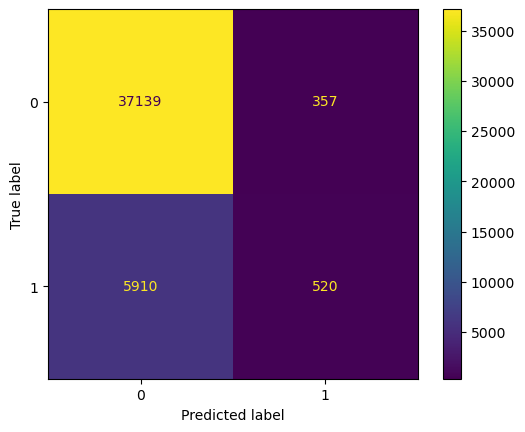

In [38]:
cm_tuned_spearman = confusion_matrix(y_test_s, y_pred_tuned_spearman)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_spearman, display_labels=rf_tuned_spearman.classes_)
disp3.plot()

**Random Forest without Hyperparameter tuning**

In [39]:
rf_vanilla_spearman = RandomForestClassifier(random_state=42)
rf_vanilla_spearman.fit(X_train_s, y_train_s)
y_pred_vanilla_spearman = rf_vanilla_spearman.predict(X_test_s)

In [40]:
print('Testing accuracy: ',accuracy_score(y_pred_vanilla_spearman, y_test_s))
print('Training accuracy:',rf_vanilla_spearman.score(X_train_s, y_train_s))
print('Classification report:\n',classification_report(y_test_s, y_pred_vanilla_spearman))

Testing accuracy:  0.8418248873104767
Training accuracy: 0.9830624231662342
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     37496
           1       0.40      0.17      0.24      6430

    accuracy                           0.84     43926
   macro avg       0.64      0.56      0.57     43926
weighted avg       0.80      0.84      0.81     43926



In [48]:
print(f'Weighted Precision score: {round(precision_score(y_test_s, y_pred_vanilla_spearman, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test_s, y_pred_vanilla_spearman, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test_s, y_pred_vanilla_spearman, average="weighted"), 4)}')

Weighted Precision score: 0.8019
Weighted Recall score: 0.8418
Weighted f1 score: 0.8129


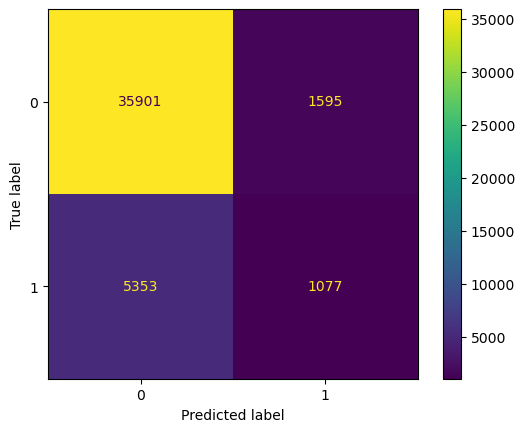

In [41]:
cm_vanilla_spearman = confusion_matrix(y_test_s, y_pred_vanilla_spearman)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_vanilla_spearman, display_labels=rf_vanilla_spearman.classes_)
disp2.plot()

